In [66]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import seaborn as sns
import utils as ut
from sklearn.utils import resample
import re


pd.options.mode.chained_assignment = None  # default='warn'

## Загрузка данных

In [67]:
PATH_DATA = './data'

# Считываем данные
mcc_codes = pd.read_csv(os.path.join(PATH_DATA, 'mcc_codes.csv'), sep=';', index_col='mcc_code')
tr_types = pd.read_csv(os.path.join(PATH_DATA, 'trans_types.csv'), sep=';', index_col='trans_type')

transactions = pd.read_csv(os.path.join(PATH_DATA, 'transactions.csv'), index_col='client_id')
gender_train = pd.read_csv(os.path.join(PATH_DATA, 'train.csv'), index_col='client_id')
transactions_train = transactions.join(gender_train, how='inner')
transactions_train = transactions_train.drop(columns='Unnamed: 0')

curr_df = transactions_train.copy()

# Подошьем типа трансакций и mcc код
curr_df['id'] = curr_df.index
curr_df = pd.merge(curr_df, mcc_codes, on='mcc_code', how='inner')
curr_df = pd.merge(curr_df, tr_types, on='trans_type', how='inner')

In [68]:
curr_df.head()

,trans_time,mcc_code,trans_type,amount,term_id,trans_city,gender,id,mcc_description,trans_description
0,313 14:52:03,4829,2370,-2170.07,888990,Saint Petersburg,0,0002cf30347684df542e1a931f356875,Денежные переводы,Списание с карты на карту по операции <перевод...
1,321 12:36:13,4829,2370,-11207.99,888905,Saint Petersburg,0,0002cf30347684df542e1a931f356875,Денежные переводы,Списание с карты на карту по операции <перевод...
2,347 16:30:07,4829,2370,-722.10,888918,Saint Petersburg,0,0002cf30347684df542e1a931f356875,Денежные переводы,Списание с карты на карту по операции <перевод...
3,334 18:58:11,4829,2370,-658.70,945006,Novosibirsk,0,0002f4661e0d4d2ae097d78552dad022,Денежные переводы,Списание с карты на карту по операции <перевод...
4,397 20:31:37,4829,2370,-217.08,945003,Khabarovsk,1,00081e0eca8ad94e493691f8f00099c6,Денежные переводы,Списание с карты на карту по операции <перевод...


In [69]:
curr_df.isnull().sum()

trans_time                 0
mcc_code                   0
trans_type                 0
amount                     0
term_id              1310923
trans_city                 0
gender                     0
id                         0
mcc_description            0
trans_description          0
dtype: int64

# Анализ датасета

## Возьмем % записей от датасета для того, чтобы ускорить анализ:

In [70]:
curr_df = resample(curr_df, n_samples=int(len(curr_df)*0.15), random_state=42)
curr_df.reset_index()

,index,trans_time,mcc_code,trans_type,amount,term_id,trans_city,gender,id,mcc_description,trans_description
0,2219110,400 11:38:22,5921,1010,-94.00,127873,Penza,0,b82599b5d77a31b69ef284cddd694dd7,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ
1,2768307,173 12:25:14,4814,1030,-72.88,NaN,Tver,1,f74c1398ead286f297e003b5e810ee99,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,2229084,164 07:58:09,5983,1010,-360.53,NaN,Khabarovsk,0,3db1dca60de74f832c80f39ba4b78ca1,"Горючее топливо — уголь, нефть, разжиженный бе...",Покупка. POS ТУ СБ РФ
3,2356330,302 16:34:41,4814,1030,-15.22,888996,Kazan,0,125b6dcb139fca9c615e0fcf6bf8e080,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,1692743,333 20:05:38,5411,1010,-224.79,470748,Moscow,1,7cb3b2a3529477a0c208609e13df68e3,"Бакалейные магазины, супермаркеты",Покупка. POS ТУ СБ РФ
...,...,...,...,...,...,...,...,...,...,...,...
485600,1376403,129 10:18:08,6011,7010,3615.34,NaN,Novosibirsk,0,78c9630f3f0a5ace4a56e90ac1bfd70a,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
485601,1783919,313 14:24:39,5411,1010,-145.42,184730,Vladivostok,1,d06d58bb928a6cb0df0b18a9942c478f,"Бакалейные магазины, супермаркеты",Покупка. POS ТУ СБ РФ
485602,378526,109 14:50:33,5912,1110,-143.45,NaN,Novosibirsk,0,ca024bf03383c585fddd94e185ec71ae,Аптеки,Покупка. POS ТУ Россия
485603,2324918,12 09:32:47,4814,1030,-36.02,NaN,Vladivostok,0,00c4dc225105e2ab6f651f758969adbd,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


## Анализ столбца Amount

In [71]:
amount = curr_df[['amount', 'gender']]

<Axes: xlabel='gender', ylabel='amount'>

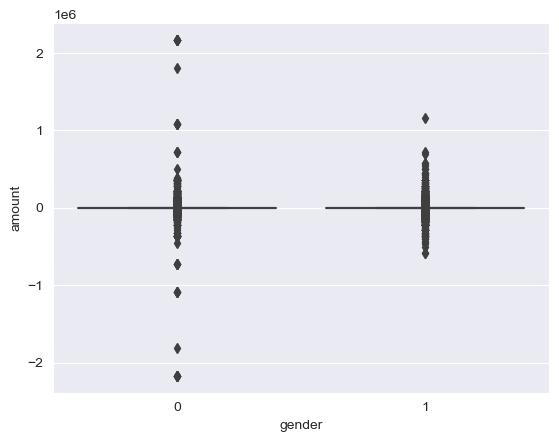

In [72]:
sns.boxplot(
    x='gender',
    y='amount',
    data=amount
)

Видны некоторые сильные выбросы. Нужно их исследовать

In [73]:
mask = curr_df.amount.between(*ut.get_conf_interval(curr_df.amount.values, 0.999))
curr_df = curr_df[mask]

<Axes: xlabel='gender', ylabel='amount'>

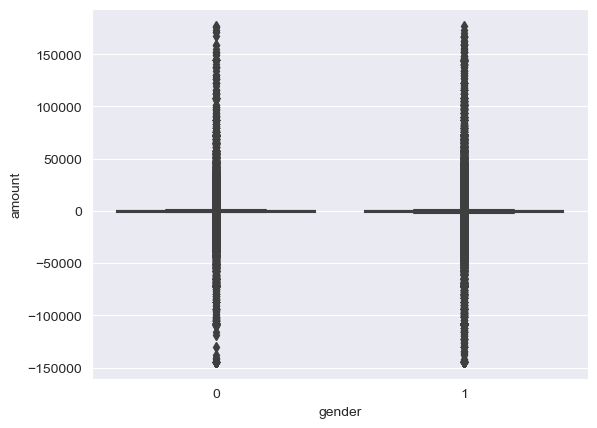

In [74]:
sns.boxplot(
    x='gender',
    y='amount',
    data=curr_df[['amount', 'gender']]
)

## Выделим основные признаки из Amount:

In [75]:
splitted_date = curr_df["trans_time"].str.split(' ', expand = True)
curr_df["Day"] = pd.DataFrame(splitted_date[0]).astype("int64")
curr_df["Time"] = pd.DataFrame(splitted_date[1].str.split(':', expand = True)[0]).astype("int64")

In [76]:
df_group = curr_df.groupby(['id'])["amount"]
# Средняя сумма транзакции за все время одним клиентом
curr_df["Mean_net_money_per_transaction"] = df_group.transform("mean").fillna(0)
# среднее отклонение транзакции за все время одним клиентом
curr_df["Std_net_money_per_transaction"] = df_group.transform("std").fillna(0)
# средняя отрицательная транзакция за все время одним клиентом.
func = lambda x: x.values[0] if x[x < 0].count() == 1 else x[x < 0].mean()
curr_df["Mean_spend_money_per_transaction"] = df_group.transform(func).fillna(0)
# средняя положительная транзакция за все время одним клиентом.
func = lambda x: x.values[0] if x[x > 0].count() == 1 else x[x > 0].mean()
curr_df["Mean_earn_money_per_transaction"] = df_group.transform(func).fillna(0)
# среднее отрицательное отклонение одним клиентом.
func = lambda x: x[x < 0].std()
curr_df["Money_spend_std_per_transaction"] = df_group.transform(func).fillna(0)
# среднее положительное отклонение одним клиентом.
func = lambda x: x[x > 0].std()
curr_df["Mean_earn_std_per_transaction"] = df_group.transform(func).fillna(0)
# отношение средней положительной и отрицательной транзакции за все время одним клиентом.
curr_df["Money_earn_spend_ratio_per_transaction"] = (curr_df["Mean_earn_money_per_transaction"].abs() / curr_df["Money_spend_std_per_transaction"].abs()).fillna(0)
# общая сумма транзакций за все время одним клиентом.
curr_df["ALL_money_net"] = df_group.transform("sum").fillna(0)
# общая сумма отрицательных транзакций за все время одним клиентом.
func = lambda x: x[x < 0].sum()
curr_df["ALL_money_spend"] = df_group.transform(func).fillna(0)
# общая сумма положительных транзакций за все время одним клиентом.
func = lambda x: x[x > 0].sum()
curr_df["ALL_money_earn"] = df_group.transform(func).fillna(0)
# отношение общих отрицательных и положительных сумм транзакций.
curr_df["ALL_money_spend_earn_ratio"] = (curr_df["ALL_money_spend"].abs() / curr_df["ALL_money_earn"].abs()).fillna(0)


In [77]:
# Частота появления
df_group1= curr_df.groupby(['id','Day'])
df_group2 = curr_df.groupby(['id'])['Day']

curr_df["Frequency_of_spending_per_day"] =  df_group1['Day'].transform("count").fillna(0)
curr_df["Frequency_of_spending_all"] =  df_group2.transform("count").fillna(0)
func = lambda x: (x.count()/7)
curr_df["Frequency_of_spending_per_week"] = df_group2.transform(func).fillna(0)

curr_df["Hours_std_transaction_per_day"] = df_group1['Time'].transform("std").fillna(0)

In [78]:
# habit
curr_df["Service_habit"] = curr_df.groupby(['id','trans_type'])['trans_type'].transform("count").fillna(0)

df_group = curr_df.groupby(['id','mcc_code'])
curr_df["Product_habit_frequency"] = df_group['mcc_code'].transform("count").fillna(0)
curr_df["Product_habit_sum_money"] = df_group['amount'].transform("sum").fillna(0)
curr_df["Product_habit_mean_money"] = df_group['amount'].transform("mean").fillna(0)

In [79]:
 # amount per day
df_group = curr_df.groupby(['id','Day'])["amount"]

curr_df["Mean_net_money_per_day"] = df_group.transform("mean")
curr_df["Std_net_money_per_day"] = df_group.transform("std").fillna(0)

### Построим графики и проанализируем их:

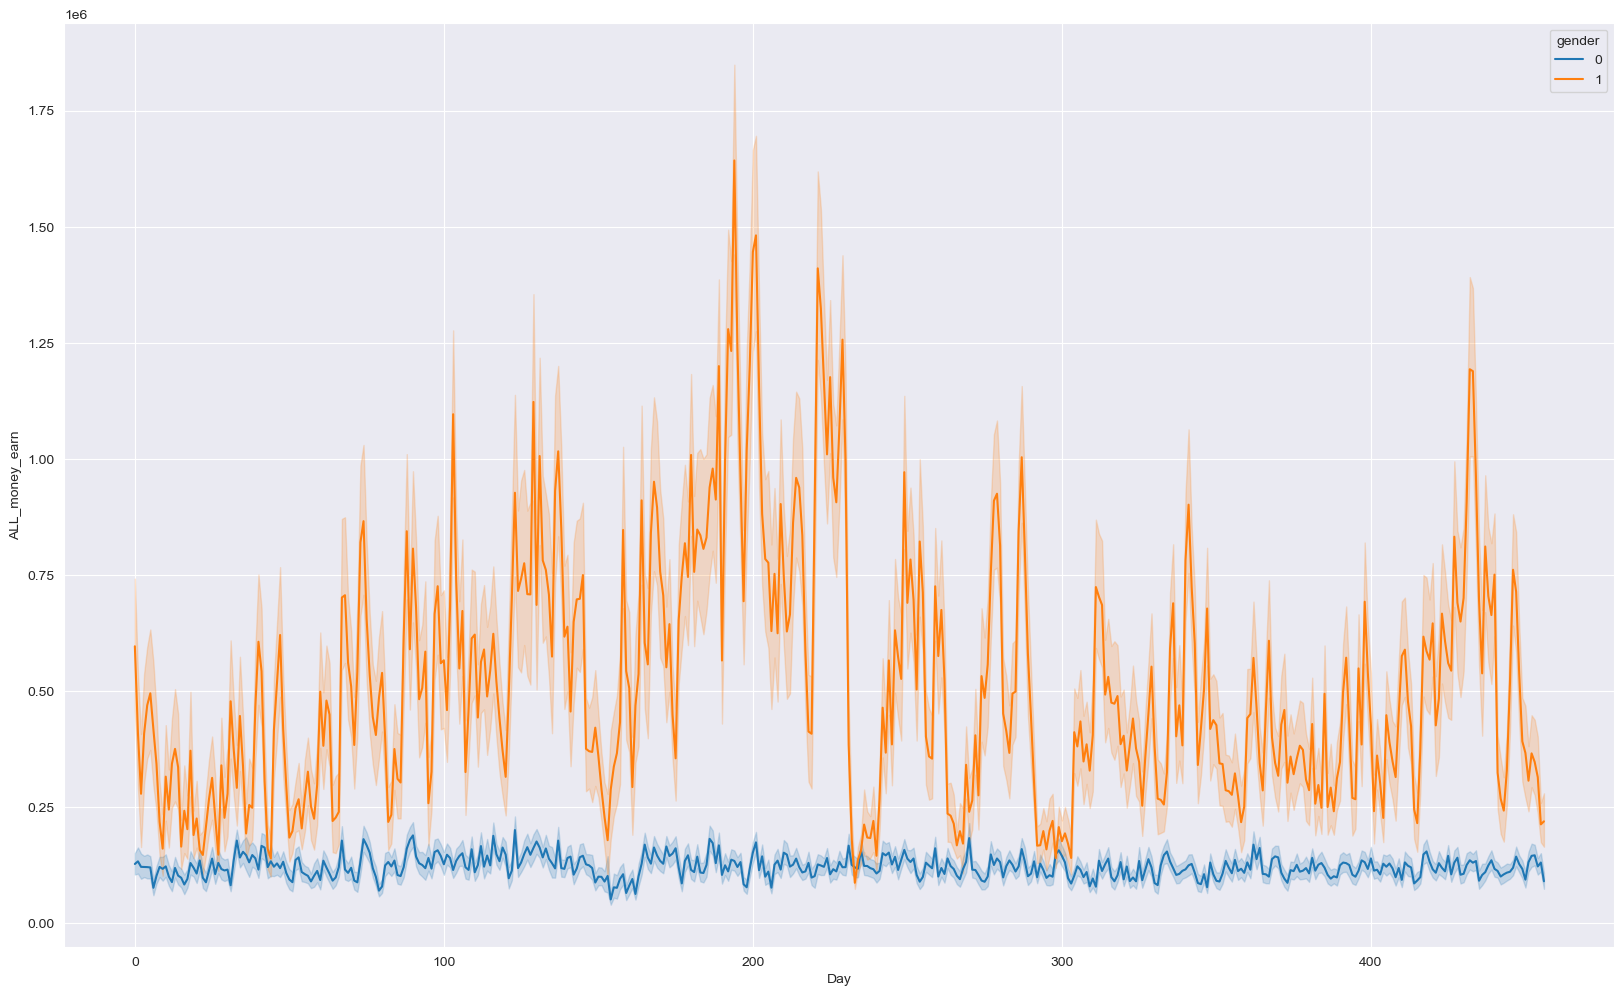

In [80]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Day',y='ALL_money_earn',data=curr_df, hue='gender')
plt.show()

**На графике изображена полная заработанная сумма по дням. Явно видно, что представители пола "1" получают в день гораздо больше, чем пол "0"**

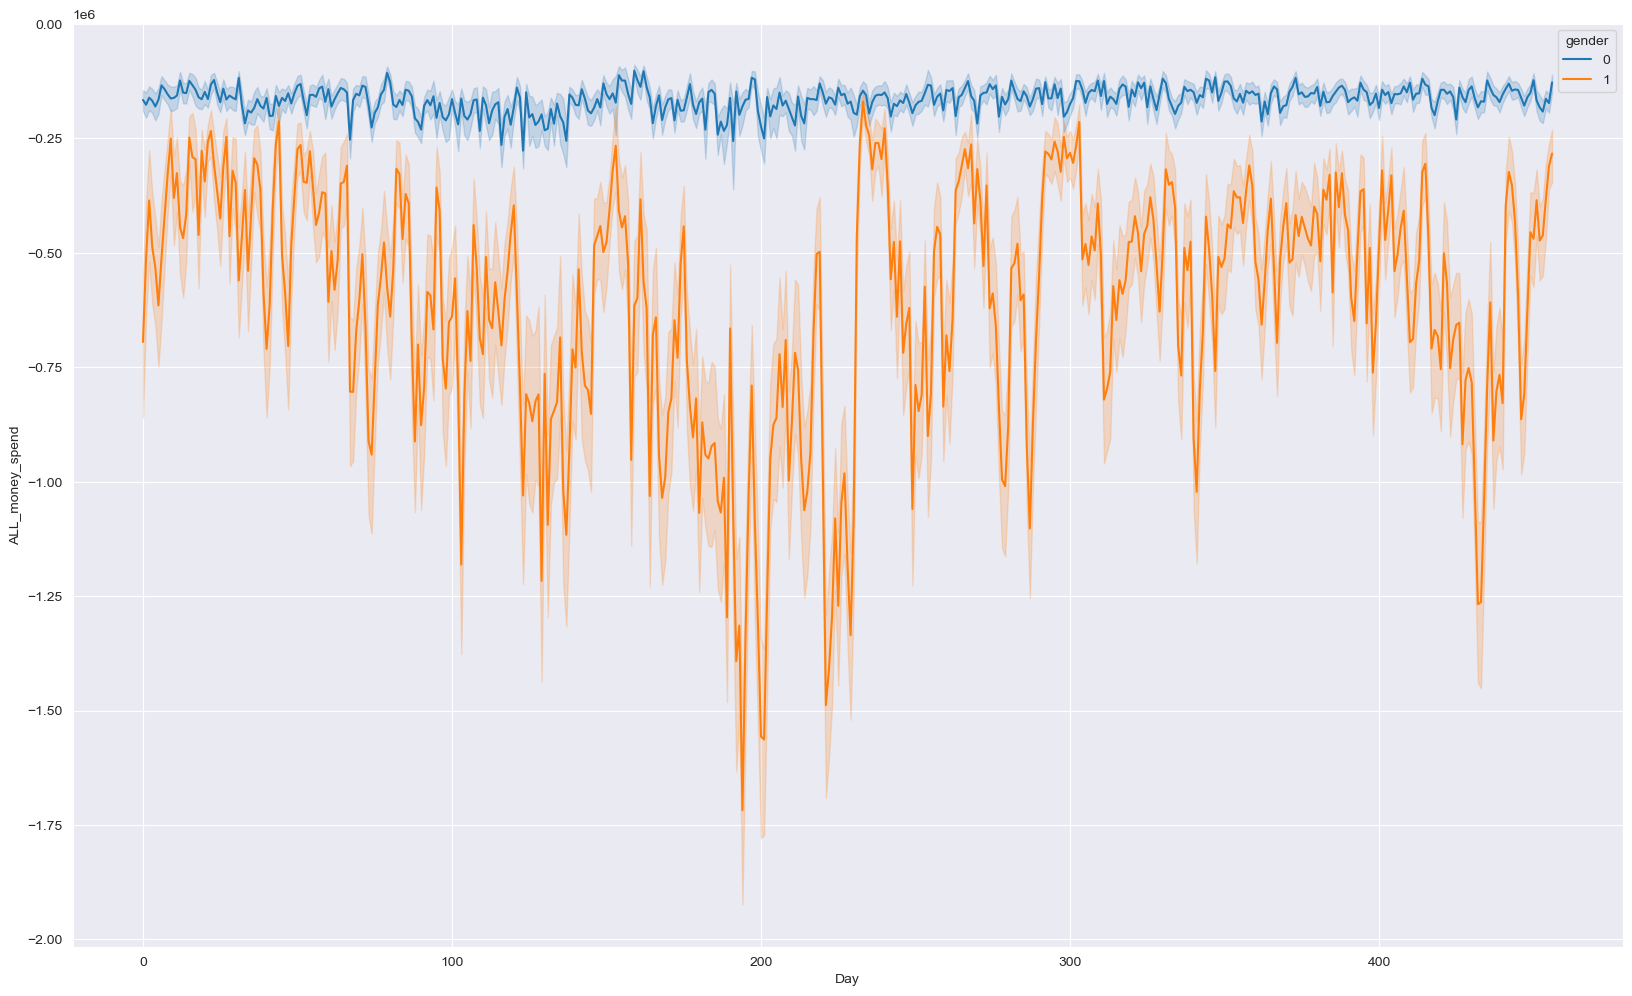

In [81]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Day',y='ALL_money_spend',data=curr_df, hue='gender')
plt.show()

**Точно такое же поведение характерно и для трат за день**

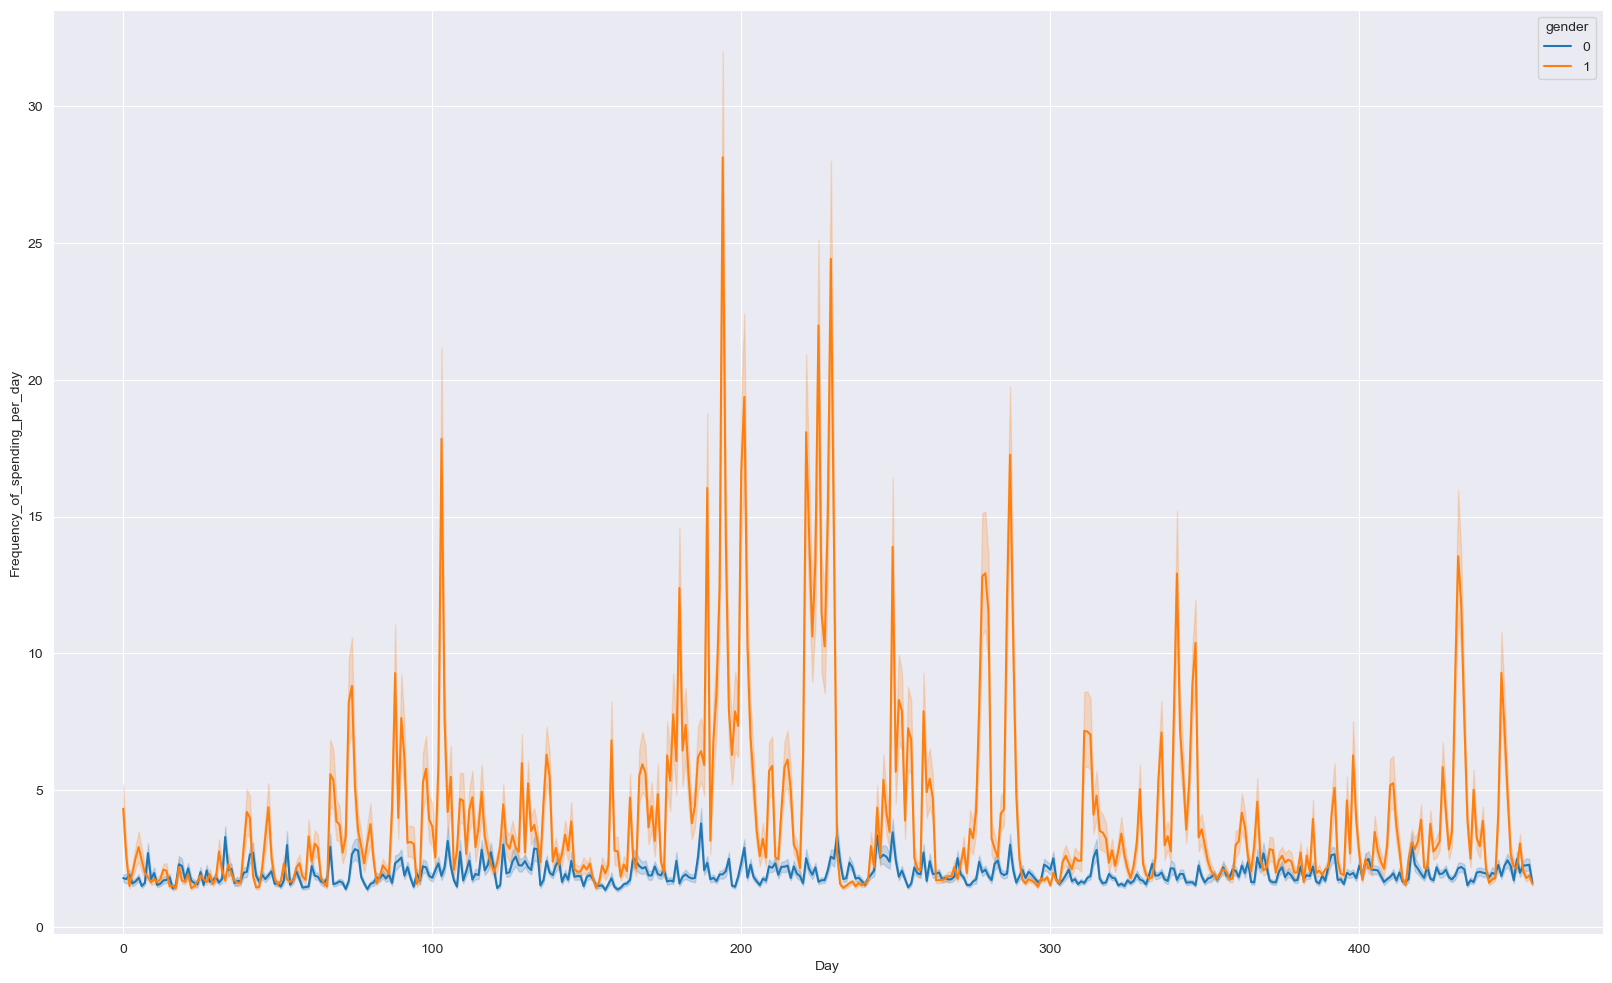

In [82]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Day',y='Frequency_of_spending_per_day',data=curr_df, hue='gender')
plt.show()

**Смотря на частоту покупок за день можно сделать точно такоц же вывод, что "0" покупает гораздо чаще, чем "1"**

## Посмотрим на матрицу корреляции:

In [83]:
num_features = ['Day', 'Time', 'Mean_net_money_per_transaction',
                'Std_net_money_per_transaction', 'Mean_spend_money_per_transaction',
                'Mean_earn_money_per_transaction', 'Money_spend_std_per_transaction',
                'Mean_earn_std_per_transaction',
                'Money_earn_spend_ratio_per_transaction', 'ALL_money_net',
                'ALL_money_spend', 'ALL_money_earn', 'ALL_money_spend_earn_ratio',
                'Frequency_of_spending_per_day', 'Frequency_of_spending_all',
                'Frequency_of_spending_per_week', 'Hours_std_transaction_per_day',
                'Service_habit', 'Product_habit_frequency', 'Product_habit_sum_money',
                'Product_habit_mean_money', 'Mean_net_money_per_day',
                'Std_net_money_per_day', 'gender']
# 'Mean_spend_money_per_day', 'Mean_earn_money_per_day',

<Axes: >

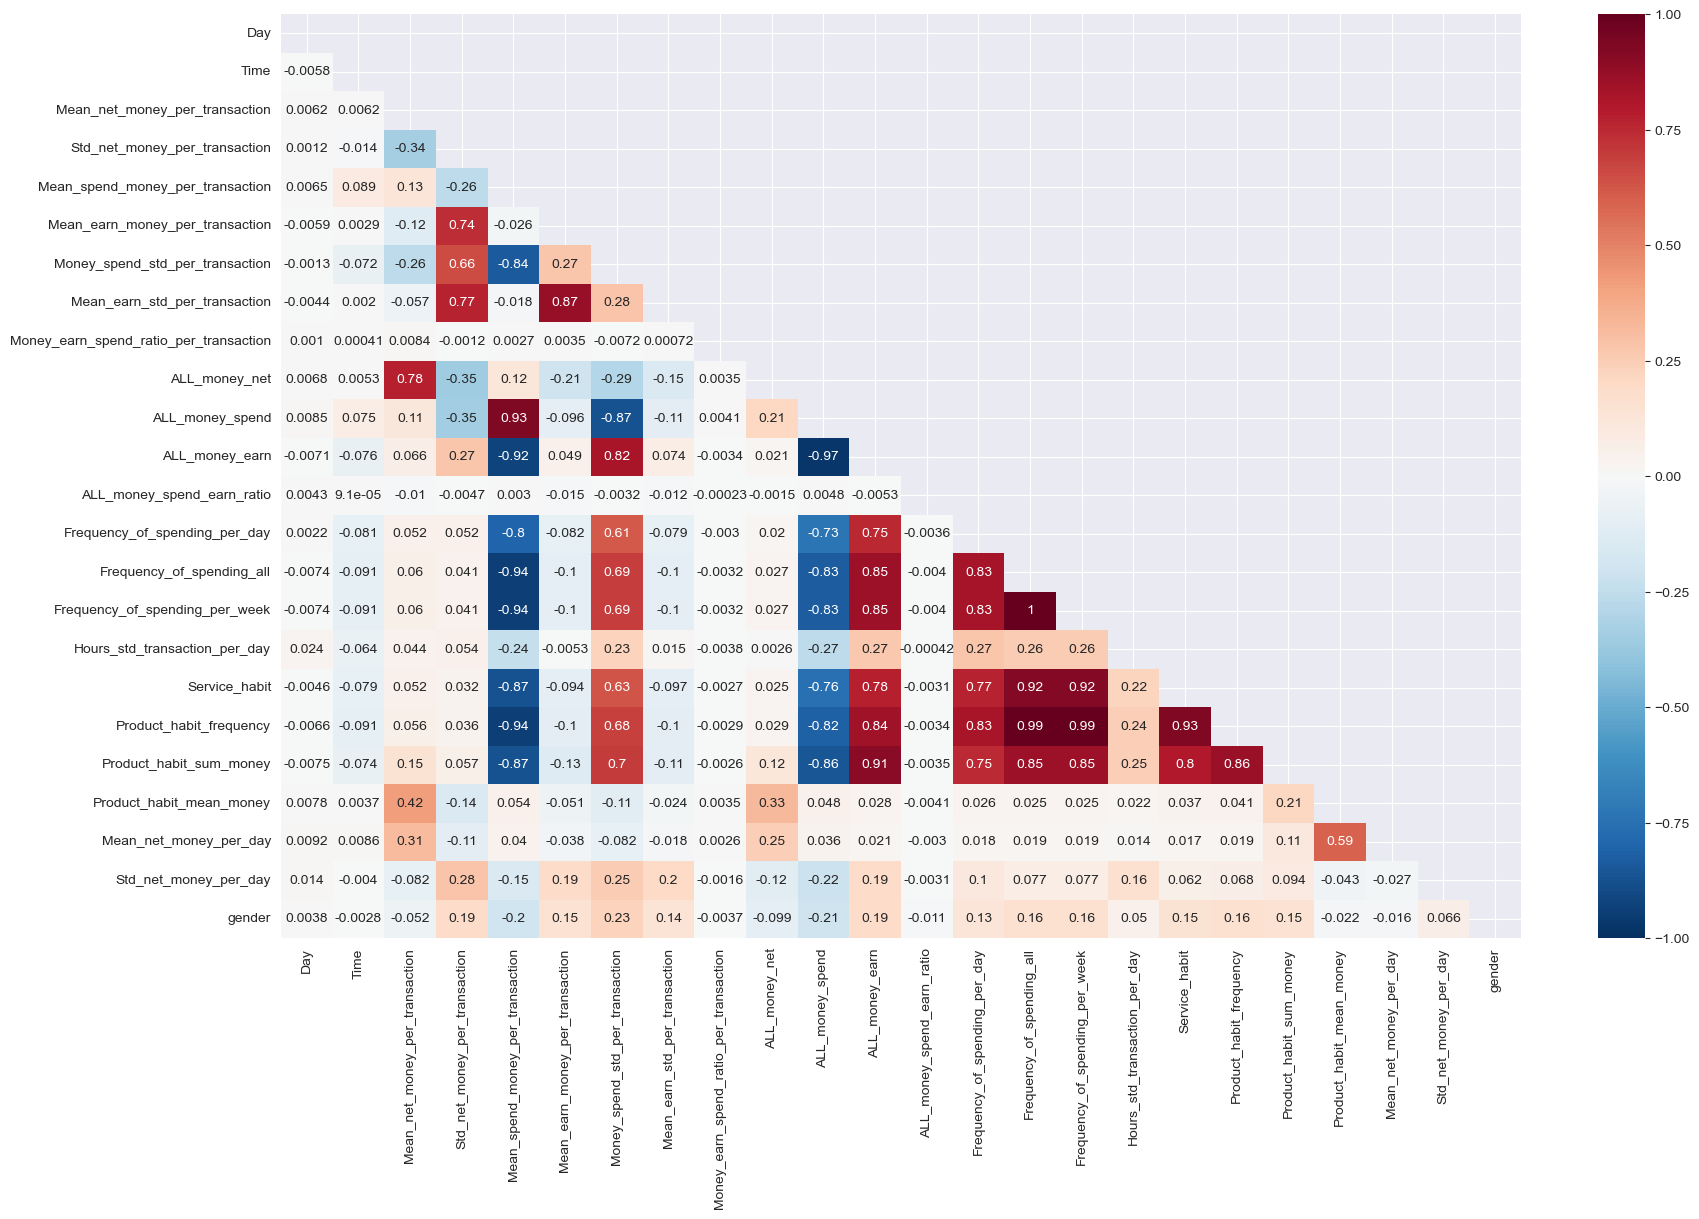

In [84]:
plt.figure(figsize=(20,12))

sns.heatmap(curr_df[num_features].corr(),
            cmap='RdBu_r', # задаёт цветовую схему
            annot=True, # рисует значения внутри ячеек
            vmin=-1, vmax=1,
            mask=np.triu(curr_df[num_features].corr()))

**Видим, что у некоторых признаков наблюдается близкая к единице корреляция. Это может привести к мультиколлинеарности -> один из данных столбцов лучше удалить, чтобы это не влияло на результат прогнозирования**

In [85]:
curr_df = curr_df.drop(columns=['Product_habit_frequency'])

# Анализ даты и времени

## Посмотрим на процент числа покупок за каждый час:

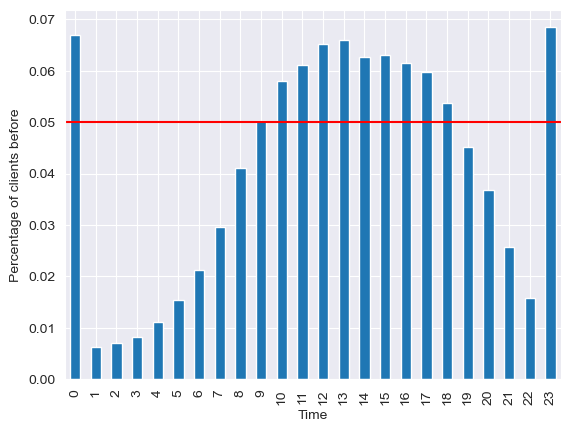

In [86]:
temp_df = pd.Series((curr_df['Time'].value_counts() / len(curr_df))).sort_index()

# make plot with the above percentages
fig = temp_df.plot.bar()

fig.set_xlabel('Time')

# add a line at 5 % to flag the threshold for rare categories
fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage of clients before')
plt.show()

**Из данной гистограммы видно, что большинство покупок совершается в промежуток с 10 до 18 часов дня. Также пик покупок в 23 и 24 часа перед сном**

In [87]:
curr_df['Night'] = ~curr_df['Time'].between(6, 22).astype('int64')
curr_df['Night'] = curr_df['Night'].replace({-1: 1, -2: 0})

### Объединим редкие часы в один признак:

<Axes: xlabel='Time', ylabel='count'>

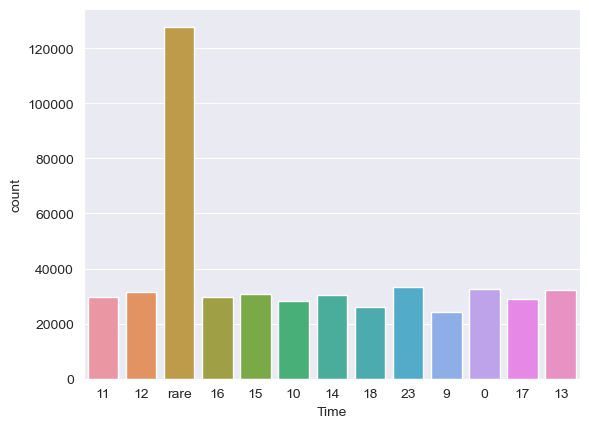

In [88]:
threshold = 0.05
curr_df = ut.rare_cats_transform(curr_df, 'Time', threshold)
sns.countplot(curr_df, x='Time')

## Посмотрим на покупки по дням:
**Идея:**
Выделить 23 февраля, 8 марта

In [89]:
# curr_df[['Day', 'mcc_description']]

In [90]:
# curr_df['mcc_description'].unique()

# Анализ категориальных признаков:

## Обработаем столбец mcc_description

**Реализуем метод, который подсчитывает количество мужчин и женщин, которые покупали товар конкретной категории и ставит соответствующее число в новый столбец.**
Таким образов мы выделим наиболее характерные для мужчин и женщин категории транзакций

In [91]:
# Создадим параметры для распараллеливания
params = (curr_df, [0.1])
threshold=0.1

import pickle
# Получение или загрузка списка с категориями и соответствующего им гендера
to_change, info = ut.get_cats_to_change(curr_df, col_name='mcc_description', threshold=threshold)
with open("./data/cats_to_change", "wb") as fp:
    pickle.dump(to_change, fp)

curr_df = ut.create_new_col(curr_df, f'mcc_desc_is_man', to_change, col_name='mcc_description')

In [92]:
info[:5]

[{'cat_name': 'Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)',
  'per_0': 0.38667005850928515,
  'per_1': 0.6133299414907148,
  'diff': 0.2266598829814297,
  '0': 1520,
  '1': 2411},
 {'cat_name': 'Звонки с использованием телефонов, считывающих магнитную ленту',
  'per_0': 0.5696627933470039,
  'per_1': 0.43033720665299613,
  'diff': 0.13932558669400774,
  '0': 40004,
  '1': 30220},
 {'cat_name': 'Горючее топливо — уголь, нефть, разжиженный бензин, дрова',
  'per_0': 0.31277728482697426,
  'per_1': 0.6872227151730257,
  'diff': 0.37444543034605143,
  '0': 705,
  '1': 1549},
 {'cat_name': 'Магазины косметики',
  'per_0': 0.794921875,
  'per_1': 0.205078125,
  'diff': 0.58984375,
  '0': 2035,
  '1': 525},
 {'cat_name': 'Аксессуары для женщин',
  'per_0': 0.7901785714285714,
  'per_1': 0.20982142857142858,
  'diff': 0.5803571428571428,
  '0': 177,
  '1': 47}]

**Исходя из словаря *info* можно предположить, что "0" - это девушки, а "1" - это мужчины**

#### Проверим, сколько % предсказания гендера по данному признаку совпадает с действительностью:

In [93]:
# curr_df.reset_index()
# cnt = 0
# for i in tqdm(range(len(curr_df))):
#     if curr_df.iloc[i]['mcc_desc_is_man'] == curr_df.iloc[i]['gender']:
#         cnt += 1
# cnt/len(curr_df)*100

## Провернем тот же трюк с trans_description

In [94]:
# Создадим параметры для распараллеливания
params = (curr_df, [0.1])
threshold=0.1

import pickle
# Получение или загрузка списка с категориями и соответствующего им гендера
to_change, info = ut.get_cats_to_change(curr_df, col_name='trans_description', threshold=threshold)
with open("./data/trans_desc_to_change", "wb") as fp:
    pickle.dump(to_change, fp)

curr_df = ut.create_new_col(curr_df, f'trans_desc_is_man', to_change, col_name='trans_description')

In [95]:
info[:5]

[{'cat_name': 'Оплата услуги. Банкоматы СБ РФ',
  'per_0': 0.57136033349738,
  'per_1': 0.4286396665026199,
  'diff': 0.1427206669947601,
  '0': 39473,
  '1': 29613},
 {'cat_name': 'Покупка. Зарубеж. ТУ',
  'per_0': 0.4256433965171829,
  'per_1': 0.574356603482817,
  'diff': 0.14871320696563411,
  '0': 2762,
  '1': 3727},
 {'cat_name': 'Выдача наличных в АТМ Сбербанка (в других ТБ)',
  'per_0': 0.43124566674370235,
  'per_1': 0.5687543332562977,
  'diff': 0.1375086665125953,
  '0': 1866,
  '1': 2461},
 {'cat_name': 'Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)',
  'per_0': 0.5886916884880224,
  'per_1': 0.4113083115119775,
  'diff': 0.17738337697604495,
  '0': 6070,
  '1': 4241},
 {'cat_name': 'Плата за получение наличных в АТМ. Зарубеж.',
  'per_0': 0.36324786324786323,
  'per_1': 0.6367521367521367,
  'diff': 0.2735042735042735,
  '0': 85,
  '1': 149}]

In [96]:
# curr_df.reset_index()
# cnt = 0
# for i in tqdm(range(len(curr_df))):
#     if curr_df.iloc[i]['trans_desc_is_man'] == curr_df.iloc[i]['gender']:
#         cnt += 1
# cnt/len(curr_df)*100

## Создадим "стереотипные" признаки из mcc_description:

In [97]:
# Категории для мужчин
moto_cat = ['Горючее топливо — уголь, нефть, разжиженный бензин, дрова', 'Станции техобслуживания', 'Автозапчасти и аксессуары', 'Легковой и грузовой транспорт — продажа, сервис, ремонт, запчасти и лизинг', 'Автошины', 'Автомойки', 'Автоматизированные бензозаправки', 'Продажа мотоциклов', 'Станции технического обслуживания для автомобильного транспорта']
some_building_materials = ['Лесо- и строительный материал', 'Строительные материалы — нигде более не классифицированные']
computers = ['Продажа электронного оборудования', 'Галереи/учреждения видеоигр', 'Принадлежности для видеоигр', 'Компьютеры, периферийное компьютерное оборудование, программное обеспечение', 'Продажа компьютерного программного обеспечения']
mens_relaxation = ['Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)', 'Транзакции по азартным играм', 'Боулинг-клубы']
mens_clothes = ['Мужская одежда и аксессуары, включая одежду для мальчиков']

# Категории для женщин:
womens_clothes = ['Обувные магазины', 'Различные магазины одежды и аксессуаров', 'Готовая женская одежда', 'Магазины second hand, магазины б/у товаров, комиссионки', 'Аксессуары для женщин']
womens_beauty = ['Магазины косметики', 'Салоты красоты и парикмахерские', 'Зубные и медицинские лаборатории']
womens_hobby = ['Магазины офисных, школьных принадлежностей, канцтоваров', 'Ткани, обивочный материал, гардины и портьеры, жалюзи', 'Магазины ткани, ниток рукоделия, шитья']
womens_moment = ['Штрафы', 'Магазины, торгующие по сниженным ценам', 'Судовые выплаты, включая алименты и детскую поддержку']

stereotypical_list = [(moto_cat, 'moto_cat'), (some_building_materials, 'some_building_materials'), (computers, 'computers'), (mens_relaxation, 'mens_relaxation'), (mens_clothes, 'mens_clothes'), (womens_clothes, 'womens_clothes'), (womens_beauty, 'womens_beauty'), (womens_hobby, 'womens_hobby'), (womens_moment, 'womens_moment')]

In [98]:
for s in stereotypical_list:
    feature_name = s[1]
    ster_list = s[0]
    curr_df = ut.create_stereotypical_feature(curr_df, feature_name, ster_list, 'mcc_description')

# Ради интереса посмотрим статистику по городам:

In [99]:
city_names = curr_df.trans_city.value_counts().index

In [100]:
from collections import Counter

def info_from_city(df, city_names, n_commons):
    for city in city_names:
        df_city = df[df.trans_city.isin([city])]

        # Разделим на мужчин и женщин
        df_male = df_city[df_city.gender == 1]
        df_female = df_city[df_city.gender == 0]
        print(city + ':')
        # Девушки
        cnt = Counter(df_female.mcc_description)
        print("Девушки:\n", cnt.most_common(n_commons))

        # Мужчины
        cnt = Counter(df_male.mcc_description)
        print("Мужчины:\n", cnt.most_common(n_commons))
        print()

In [101]:
info_from_city(curr_df, city_names, 20)

Kaliningrad:
Девушки:
 [('Финансовые институты — снятие наличности автоматически', 5580), ('Звонки с использованием телефонов, считывающих магнитную ленту', 4291), ('Бакалейные магазины, супермаркеты', 3952), ('Финансовые институты — снятие наличности вручную', 3349), ('Денежные переводы', 2378), ('Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов', 1403), ('Аптеки', 637), ('Универсальные магазины', 621), ('Места общественного питания, рестораны', 301), ('Прямой маркетинг — торговля через каталог', 273), ('Станции техобслуживания', 265), ('Плавательные бассейны — распродажа', 231), ('Рестораны, закусочные', 216), ('Магазины косметики', 194), ('Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)', 167), ('Магазины мужской и женской одежды', 164), ('Товары для дома', 141), ('Универмаги', 119), ('Рекламные услуги', 109), ('Обувные магазины', 107)]
Мужчины:
 [('Финансовы

# Подготовим датасет к сохранению в csv файл

In [102]:
curr_df.columns

Index(['trans_time', 'mcc_code', 'trans_type', 'amount', 'term_id',
       'trans_city', 'gender', 'id', 'mcc_description', 'trans_description',
       'Day', 'Time', 'Mean_net_money_per_transaction',
       'Std_net_money_per_transaction', 'Mean_spend_money_per_transaction',
       'Mean_earn_money_per_transaction', 'Money_spend_std_per_transaction',
       'Mean_earn_std_per_transaction',
       'Money_earn_spend_ratio_per_transaction', 'ALL_money_net',
       'ALL_money_spend', 'ALL_money_earn', 'ALL_money_spend_earn_ratio',
       'Frequency_of_spending_per_day', 'Frequency_of_spending_all',
       'Frequency_of_spending_per_week', 'Hours_std_transaction_per_day',
       'Service_habit', 'Product_habit_sum_money', 'Product_habit_mean_money',
       'Mean_net_money_per_day', 'Std_net_money_per_day', 'Night',
       'mcc_desc_is_man', 'trans_desc_is_man', 'moto_cat',
       'some_building_materials', 'computers', 'mens_relaxation',
       'mens_clothes', 'womens_clothes', 'womens_bea

In [103]:
# Удалим ненужные столбцы:
columns_to_drop = ['trans_time', 'term_id', 'trans_city', 'mcc_description', 'trans_description', 'trans_type']
curr_df.drop(columns=columns_to_drop, inplace=True)

## Стандартизация

In [104]:
cols_to_stand = ['amount',
                 'Mean_net_money_per_transaction', 'Std_net_money_per_transaction',
                 'Mean_spend_money_per_transaction', 'Mean_earn_money_per_transaction',
                 'Money_spend_std_per_transaction', 'Mean_earn_std_per_transaction',
                 'Money_earn_spend_ratio_per_transaction', 'ALL_money_net',
                 'ALL_money_spend', 'ALL_money_earn', 'ALL_money_spend_earn_ratio',
                 'Hours_std_transaction_per_day',
                 'Service_habit', 'Product_habit_sum_money', 'Product_habit_mean_money',
                 'Mean_net_money_per_day', 'Std_net_money_per_day']
# 'Mean_spend_money_per_day', 'Mean_earn_money_per_day',

In [105]:
from sklearn.preprocessing import StandardScaler

for col in cols_to_stand:
    scaler = StandardScaler()
    try:
        curr_df[f'{col}'] = scaler.fit_transform(curr_df[f'{col}'].values.reshape(-1, 1))
    except ValueError:
        continue

## Чтобы уменьшить вес .csv файла, преобразует типы данных из *64 в *16

In [106]:
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485119 entries, 2219110 to 1043738
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   mcc_code                                485119 non-null  int64  
 1   amount                                  485119 non-null  float64
 2   gender                                  485119 non-null  int64  
 3   id                                      485119 non-null  object 
 4   Day                                     485119 non-null  int64  
 5   Time                                    485119 non-null  object 
 6   Mean_net_money_per_transaction          485119 non-null  float64
 7   Std_net_money_per_transaction           485119 non-null  float64
 8   Mean_spend_money_per_transaction        485119 non-null  float64
 9   Mean_earn_money_per_transaction         485119 non-null  float64
 10  Money_spend_std_per_transaction         48

In [107]:
import warnings
warnings.filterwarnings("ignore")

for col in curr_df.columns:
    if str(type(curr_df[col].dtypes)) == '<class \'numpy.dtype[int64]\'>':
        curr_df[col] = curr_df[col].astype('int16')
    elif str(type(curr_df[col].dtypes)) == '<class \'numpy.dtype[float64]\'>':
        curr_df[col] = curr_df[col].astype('float16')

In [108]:
for col in curr_df.columns:
    curr_df[col].replace(np.inf, 1000, inplace = True)
    curr_df[col].replace(-np.inf, 1000, inplace = True)
    curr_df[col].fillna(0)

In [109]:
curr_df

,mcc_code,amount,gender,id,Day,Time,Mean_net_money_per_transaction,Std_net_money_per_transaction,Mean_spend_money_per_transaction,Mean_earn_money_per_transaction,...,trans_desc_is_man,moto_cat,some_building_materials,computers,mens_relaxation,mens_clothes,womens_clothes,womens_beauty,womens_hobby,womens_moment
2219110,5921,0.070618,0,b82599b5d77a31b69ef284cddd694dd7,400,11,0.058777,-0.725098,0.275391,-0.623535,...,0,0,0,0,1,0,0,0,0,0
2768307,4814,0.072998,1,f74c1398ead286f297e003b5e810ee99,173,12,0.229492,0.108215,-0.165283,-0.527832,...,0,0,0,0,0,0,0,0,0,0
2229084,5983,0.040161,0,3db1dca60de74f832c80f39ba4b78ca1,164,rare,0.231812,-0.533691,0.281982,-0.356445,...,0,1,0,0,0,0,0,0,0,0
2356330,4814,0.079590,0,125b6dcb139fca9c615e0fcf6bf8e080,302,16,0.201538,-0.561523,0.259277,-0.381836,...,0,0,0,0,0,0,0,0,0,0
1692743,5411,0.055664,1,7cb3b2a3529477a0c208609e13df68e3,333,rare,-0.070740,-0.468262,0.239502,0.008041,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376403,6011,0.494141,0,78c9630f3f0a5ace4a56e90ac1bfd70a,129,10,0.389893,-0.554688,0.280762,-0.312012,...,0,0,0,0,0,0,0,0,0,0
1783919,5411,0.064697,1,d06d58bb928a6cb0df0b18a9942c478f,313,14,0.126709,-0.735840,0.286621,-0.621094,...,0,0,0,0,0,0,0,0,0,0
378526,5912,0.064941,0,ca024bf03383c585fddd94e185ec71ae,109,14,0.052216,-0.039764,0.180664,0.137817,...,0,0,0,0,0,0,0,0,0,0
2324918,4814,0.077209,0,00c4dc225105e2ab6f651f758969adbd,12,9,0.056732,-0.657715,0.269531,-0.526855,...,0,0,0,0,0,0,0,0,0,0


## Сформируем файл для теста

In [110]:
sample = curr_df.sample(n=2000, random_state=42)
sample.to_csv('./data/to_test.csv', index=False)

curr_df = curr_df.drop(index=sample.index)

## Балансировка датасета:

In [111]:
curr_df = ut.balance_the_dataset(curr_df, 'gender')

In [112]:
curr_df.to_csv("./data/to_train.csv", index=False)